# Data Wrangling, Cleaning of Data, Exploration of Data to make it consistent for Analysis

In [1]:
%matplotlib inline

In [2]:
# importing required libraries

import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")

In [19]:
# getting absolute path till the raw data file
abs_path = os.getcwd()[:-15]
raw_data_path = r"D:\car_project_analysis\RawData\autos.csv"

# reading csv into raw dataframe
df = pd.read_csv(raw_data_path,encoding="latin-1")

In [4]:
# checking the column vehicleType for null values 
df["vehicleType"].isnull().values.sum()

37869

In [5]:
# changing the vehicleType from NaN to Others
df["vehicleType"].fillna("Other", inplace=True)

In [6]:
# checking if there are any null values in the column brand
df["brand"].isnull().value_counts()

False    371528
Name: brand, dtype: int64

In [7]:
# checking if there are any null values in the column seller
df["seller"].isnull().value_counts()

False    371528
Name: seller, dtype: int64

In [8]:
# checking if there are any null values in the offerType 
df["offerType"].isnull().value_counts()

False    371528
Name: offerType, dtype: int64

In [9]:
# checking the different types of values in the column offerType
df["offerType"].unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [10]:
# changing values of offerType Gesuch to Request and Angebot to Offer
df["offerType"] = df["offerType"].map({'Gesuch':"Request",'Angebot':'Offer'})

In [11]:
# checking if there are any null values in the yearOfRegistration
df["yearOfRegistration"].isnull().value_counts()

False    371528
Name: yearOfRegistration, dtype: int64

In [14]:
# dropping rows that are inconsistent with the dataset based on year of registration
df = df[(df["yearOfRegistration"] >= 1890) & (df["yearOfRegistration"] <= 2016)]

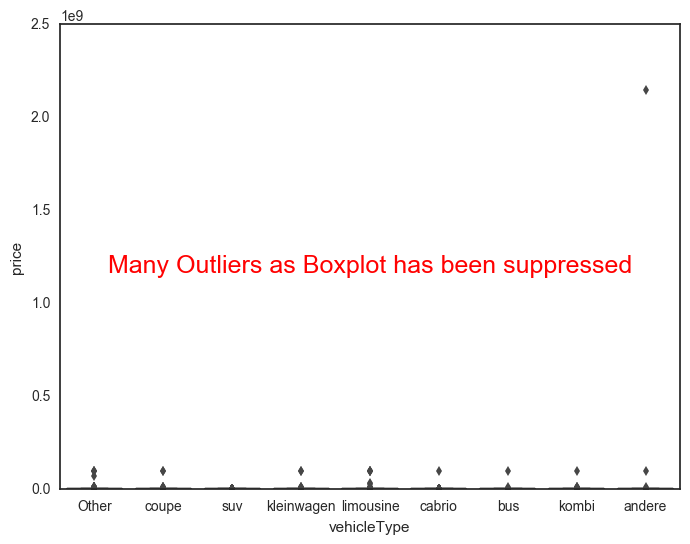

In [17]:
# Boxplot to see the distribution after outliers has been removed
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(4,1.2*(10**9),"Many Outliers as Boxplot has been suppressed",fontsize=18,color="r",ha="center", va="center")
plt.show()

In [209]:
# Mean of the prices of all the vehicle types
_median = df.groupby("vehicleType")["price"].median()

# 75th percentile of the prices of all the vehicles types
_quantile75 = df.groupby("vehicleType")["price"].quantile(0.75)

# 25th percentile of the prices of all the vehicles types
_quantile25 = df.groupby("vehicleType")["price"].quantile(0.25)

# Calculating the value of the prices of each vehicle type above which all the values are outliers
iqr = (_quantile75 - _quantile25)*1.5 + _median
iqr

vehicleType
Other          3708.000
andere         8429.500
bus           13948.500
cabrio        21400.000
coupe         24300.000
kleinwagen     5775.000
kombi         13076.875
limousine     12801.500
suv           28800.000
Name: price, dtype: float64

In [212]:
# Removing the outliers as per the logic above
df = df[((df["vehicleType"] == "andere") & (df["price"] <= 8429)) |
        ((df["vehicleType"] == "Other") & (df["price"] <= 3708)) |
        ((df["vehicleType"] == "suv") & (df["price"] <= 28800)) |
        ((df["vehicleType"] == "kombi") & (df["price"] <= 13076)) |
        ((df["vehicleType"] == "bus") & (df["price"] <= 13948)) |
        ((df["vehicleType"] == "cabrio") & (df["price"] <= 21400)) |
        ((df["vehicleType"] == "limousine") & (df["price"] <= 12801)) |
        ((df["vehicleType"] == "coupe") & (df["price"] <= 24300)) |
        ((df["vehicleType"] == "kleinwagen") & (df["price"] <= 5775))]

In [215]:
# checking if the gearbox column has null values
df["gearbox"].isnull().value_counts()

# setting the NaN gearbox types to Unspecified
df["gearbox"].fillna("Unspecified", inplace=True)

In [217]:
# checking if the fuelType has null values
df["fuelType"].isnull().value_counts()

False    288358
True      25329
Name: fuelType, dtype: int64

In [218]:
# setting the NaN fuelType types to other
df["fuelType"].fillna("other",inplace=True)

In [219]:
# checking how many unique types of fuelTypes are present
df["fuelType"].unique()

array(['benzin', 'diesel', 'other', 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [220]:
# Changing german names to english readable format
df["fuelType"] = df["fuelType"].map({'benzin':'Gasoline','diesel':'Diesel','other':'Other','lpg':'Lpg','hybrid':'Hybrid','cng':'Cng','elektro':'Electric'})

In [221]:
# deleting the column noOfPictures since all of them are Zero
del df["nrOfPictures"]

In [225]:
# splitting dateCreated by year
df["yearOfCreation"] = df['dateCreated'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%Y'))

# splitting dateCrawled by year
df["yearCrawled"] = df['dateCrawled'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%Y'))

# splitting dateCreated by month
df["monthOfCreation"] = df['dateCreated'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%B'))

# splitting dateCrawled by month
df["monthCrawled"] = df['dateCrawled'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%B'))

# no of days seen online
from_date = df['dateCreated'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())
to_date = df['lastSeen'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())
no_days = abs((to_date-from_date))
no_days = (no_days / np.timedelta64(1, 'D')).astype(int)
df["NoOfDaysOnline"] = no_days

# no of hrs seen online
hrs_from = df['dateCreated'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').time().strftime('%H'))
hrs_to = df['lastSeen'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').time().strftime('%H'))
total_hrs = (hrs_to.astype(int) - hrs_from.astype(int))
df["NoOfHrsOnline"] = total_hrs

In [228]:
# checking for null values in powerPS column
df["powerPS"].isnull().value_counts()

False    313687
Name: powerPS, dtype: int64

In [231]:
# checking for unique values in notRepairedDamage
df["notRepairedDamage"].unique()

array(['other', 'ja', 'nein'], dtype=object)

In [230]:
# setting nan in notRepairedDamage to other
df["notRepairedDamage"].fillna("other",inplace=True)

In [232]:
# Changing german names to english readable format
df["notRepairedDamage"] = df["notRepairedDamage"].map({'other':'Other','ja':'Yes','nein':'No'})

In [238]:
# checking for unique values in model column
df["model"].isnull().value_counts()

False    297078
True      16609
Name: model, dtype: int64

In [239]:
# setting nan in model column to Other
df["model"].fillna("Other",inplace=True)

In [247]:
# checking for null values in abtest column
df["abtest"].isnull().value_counts()

False    313687
Name: abtest, dtype: int64

In [271]:
# mappig the values on monthOfRegistration column from 1-12 
df["monthOfRegistration"].replace([0,12],[1,11],inplace=True)

In [274]:
# calculating no of years the vehicle is old
df["yearsOld"] = 2016 - df["yearOfRegistration"]

# calculating no of months the vehicle is old
df["monthsOld"] = 12 - df["monthOfRegistration"]


In [276]:
# mappig the values on monthOfRegistration column from 1-12 to Jan to Dec
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]
df["monthOfRegistration"].replace([1,2,3,4,5,6,7,8,9,10,11],months,inplace=True)

In [281]:
# checking if postal code values are null
df["postalCode"].isnull().value_counts()

False    313687
Name: postalCode, dtype: int64

In [303]:
# saving the data file as csv to current directory location
path_to_file  = r"D:\car_project_analysis\CleanData\CleanedDataSet\cleaned_autos.csv"
df.to_csv(path_to_file,index=False)